## Generating dataset

In [1]:
import cv2

In [2]:
def generate_dataset():
    name = input("Enter the name of the person: ")

    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
    
    cap = cv2.VideoCapture(0)
    img_id = 0
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            #file_name_path = "data/"+"Ishwar."+str(img_id)+".jpg"
            file_name_path = "dataset/"+ name + "_" + str(img_id)+'.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
            
            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id)==100:
                break

    cap.release()
    cv2.destroyAllWindows()
    print("Collecting samples is completed !!!")
#generate_dataset()

In [3]:
generate_dataset()

## Create Label

In [4]:
import numpy as np

In [5]:
def student_label(image_name):
    name = image_name.split("_")[0]

    if name=='Himanshu':
        return np.array([0,0,1])
    elif name=='Mitul':
        return np.array([0,1,0])
    elif name == 'Harshil':
        return np.array([1,0,0]) 

## Create Data


In [6]:
import os
from random import shuffle
from tqdm import tqdm

In [7]:
def student_data():
    data = []
    for img in tqdm(os.listdir("dataset")):
        path = os.path.join("dataset", img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data),student_label(img)])

    shuffle(data)
    return data

In [8]:
data = student_data()

100%|██████████| 300/300 [00:00<00:00, 2056.26it/s]


In [9]:
training_data = data[:220]
testing_data = data[220:]
X_train = np.array([i[0] for i in training_data]).reshape(-1,50,50,1)
print(X_train)
Y_train = np.array([i[1] for i in training_data])
print(Y_train)
X_test = np.array([i[0] for i in testing_data]).reshape(-1,50,50,1)
print(X_test)
Y_test = np.array([i[1] for i in testing_data])
print(Y_test)

[[[[244]
   [243]
   [242]
   ...
   [ 52]
   [ 54]
   [118]]

  [[245]
   [244]
   [242]
   ...
   [ 52]
   [ 56]
   [ 55]]

  [[243]
   [242]
   [241]
   ...
   [ 52]
   [ 55]
   [ 58]]

  ...

  [[ 45]
   [ 50]
   [ 61]
   ...
   [ 39]
   [ 41]
   [ 48]]

  [[ 46]
   [ 56]
   [ 66]
   ...
   [ 40]
   [ 42]
   [ 47]]

  [[ 49]
   [ 61]
   [ 63]
   ...
   [ 40]
   [ 41]
   [ 48]]]


 [[[ 81]
   [ 81]
   [ 81]
   ...
   [ 69]
   [ 71]
   [ 70]]

  [[ 81]
   [ 81]
   [ 80]
   ...
   [ 62]
   [ 69]
   [ 71]]

  [[ 83]
   [ 81]
   [ 79]
   ...
   [ 57]
   [ 69]
   [ 70]]

  ...

  [[116]
   [156]
   [144]
   ...
   [ 73]
   [ 71]
   [ 72]]

  [[184]
   [161]
   [182]
   ...
   [ 80]
   [ 79]
   [ 76]]

  [[189]
   [198]
   [136]
   ...
   [ 82]
   [ 81]
   [ 82]]]


 [[[234]
   [237]
   [110]
   ...
   [ 67]
   [186]
   [204]]

  [[231]
   [217]
   [107]
   ...
   [ 63]
   [200]
   [205]]

  [[235]
   [215]
   [139]
   ...
   [ 63]
   [195]
   [205]]

  ...

  [[ 56]
   [ 40]
   [ 34]
   

## Create the model

In [10]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

/home/himanshurathod/dev_Work/anitsheating/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/himanshurathod/dev_Work/anitsheating/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/himanshurathod/dev_Work/anitsheating/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hima

In [11]:
tf.reset_default_graph()
convnet = input_data(shape=[50,50,1])
convnet = conv_2d(convnet,32,5,activation='relu')

convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,64,5,activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,128,5,activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,64,5,activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,32,5,activation='relu')
convnet = max_pool_2d(convnet,5)

convnet = fully_connected(convnet,1024, activation='relu')
convnet = dropout(convnet, 0.8)


convnet = fully_connected(convnet,3, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)

model.fit(X_train, Y_train, n_epoch=12, validation_set=(X_test,Y_test) , show_metric = True, run_id="FRS" )

Training Step: 47  | total loss: 0.00807 | time: 0.203s
| Adam | epoch: 012 | loss: 0.00807 - acc: 0.9992 -- iter: 192/220
Training Step: 48  | total loss: 0.00680 | time: 1.261s
| Adam | epoch: 012 | loss: 0.00680 - acc: 0.9993 | val_loss: 0.27619 - val_acc: 0.9875 -- iter: 220/220
--


## Let's Visualize the data and make prediction

In [12]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Images_for_visualization")):
        path = os.path.join("Images_for_visualization",img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data,(50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [13]:
Vdata = data_for_visualization()

100%|██████████| 60/60 [00:00<00:00, 887.32it/s]


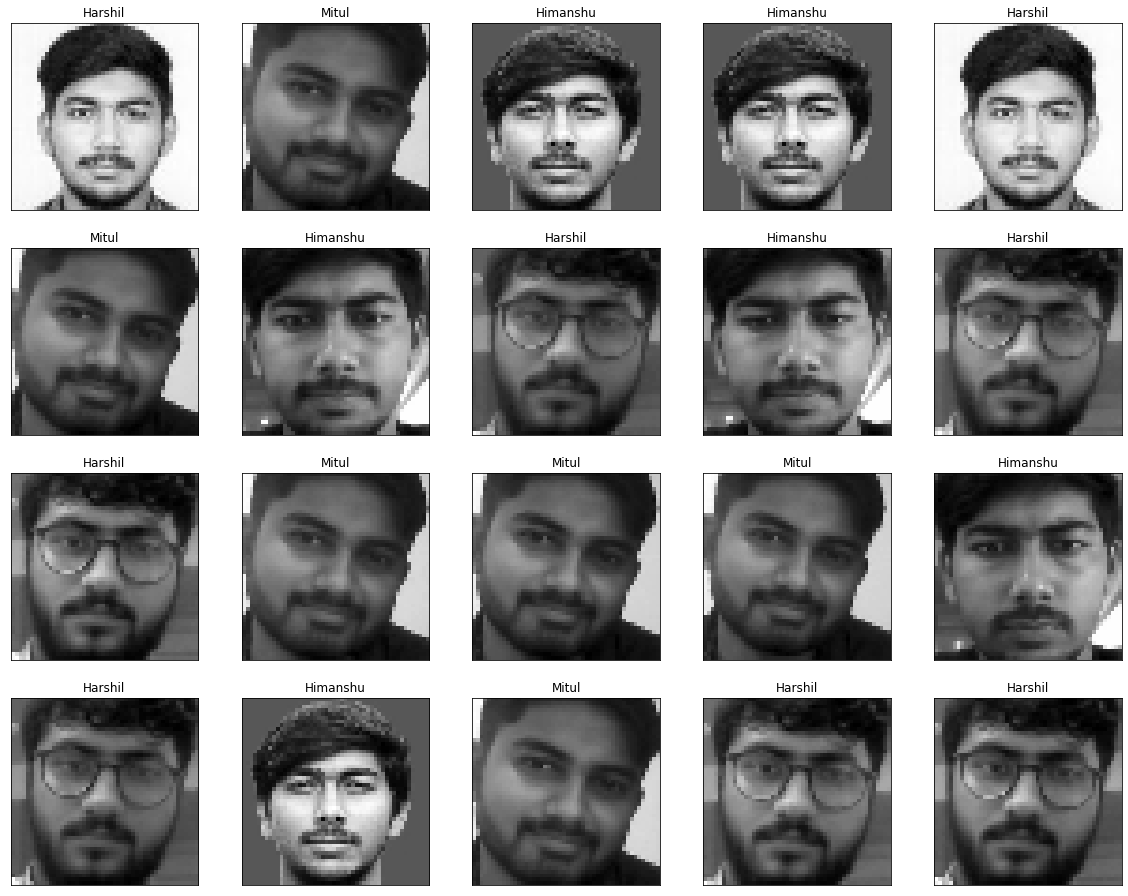

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5,num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]

    if np.argmax(model_out) == 0 :
        student_label = 'Harshil'
    elif np.argmax(model_out) == 1:
        student_label = 'Mitul'
    else:
        student_label = 'Himanshu'


    y.imshow(image, cmap='gray')
    plt.title(student_label)

    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
        
plt.show()